# Linear and nonlinear regression

This notebook will use **scipy**, **statsmodels**, and **scikit-learn** for
performing linear and nonlinear regressions.

The statistical package **statsmodels** and the machine-learning package
**scikit-learn** are the packages choice for most regression tasks. The
terminology used by the two is different, but there is a degree of overlap. Both
are powerful and are evolving rapidly. At this time of writing, **statsmodels**
has broader support for time-series analysis (such as ARIMA models), whereas
**scikit-learn** has more modern algorithms including ridge regression and
Bayesian methods.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

First we illustrate the concepts with a very simple 2D example: the relationship
between the time students spend studying and their test scores:

In [3]:
study_hours = [4, 9, 10, 14, 4, 7, 12, 22, 1, 3, 8, 11, 5, 6, 10, 11, 16, 13, 13, 10]
SAT_scores = [390, 580, 650, 730, 410, 530, 600, 790, 350, 400, 590, 640, 450, 520, 690, 690, 770, 700, 730, 640]

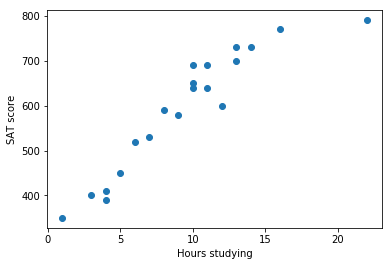

In [4]:
plt.plot(study_hours, SAT_scores, 'o')
plt.xlabel('Hours studying')
plt.ylabel('SAT score');

## Linear regression in statsmodels

This is the recommended way to import statsmodels:

In [5]:
import statsmodels.api as sm

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Statsmodels can work directly with Pandas Series and DataFrames:

In [6]:
X = pd.Series(study_hours, name="Hours studying")
Y = pd.Series(SAT_scores, name="SAT score")

In [7]:
# Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X, prepend=False)

In [8]:
model = sm.OLS(Y, X)   # ordinary least squares

In [9]:
results = model.fit()

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SAT score   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     122.2
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           1.87e-09
Time:                        22:34:06   Log-Likelihood:                -105.45
No. Observations:                  20   AIC:                             214.9
Df Residuals:                      18   BIC:                             216.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Hours studying    25.3265      2.291     11.

In [12]:
results.params

Hours studying     25.326468
const             353.164879
dtype: float64

In [13]:
results.predict(X)

0     454.470751
1     581.103089
2     606.429557
3     707.735428
4     454.470751
5     530.450154
6     657.082493
7     910.347171
8     378.491347
9     429.144283
10    555.776622
11    631.756025
12    479.797218
13    505.123686
14    606.429557
15    631.756025
16    758.388364
17    682.408961
18    682.408961
19    606.429557
dtype: float64

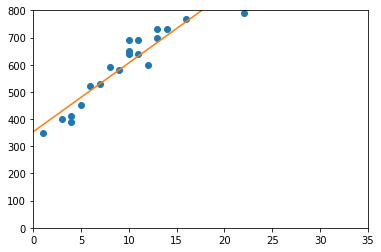

In [14]:
x = np.linspace(0, 35)
fitted = results.predict(sm.add_constant(x, prepend=False))
plt.plot(study_hours, SAT_scores, 'o')
plt.plot(x, fitted)
plt.xlim(0, 35)
plt.ylim(0, 800);

### Formula interface

A package called **patsy** makes it easy to create design matrices for
statistical packages like **statsmodels** using R-style formulas as strings. Use
it like this:

In [15]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [16]:
import patsy

In [17]:
y, X = patsy.dmatrices('Lottery ~ Literacy * Wealth', df, return_type='dataframe')
model = sm.OLS(y, X)   # ordinary least squares

Recent versions of the **statsmodels** package also support this newer interface
with R-style formulas directly:

In [18]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Lottery ~ Literacy * Wealth', data=df)

And then we can fit and use the model as before with ``model.fit()`` etc.

Note that various transformations of the input variables are supported, such as
this:

In [19]:
model = smf.ols(formula='Lottery ~ np.log(Literacy) * Wealth', data=df)

## Linear regression with scikit-learn

Before moving onto a non-linear regression example, we show how we can perform a
linear regression using **scikit-learn**.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [21]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [22]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [23]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47


([], <a list of 0 Text yticklabel objects>)

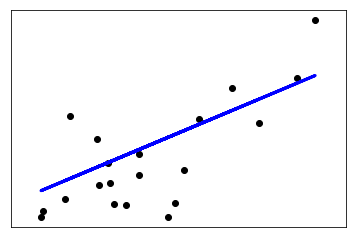

In [25]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

## Non-linear regression example

This example shows ordinary least-squares with a non-linear curve that is linear
in the parameters. (It comes from ``statsmodels/examples/example_OLS.py`` in the
statsmodels source tree.)

In [26]:
# Non-linear relationship between x and y
N = 50  # number of samples
sig = 0.5
x = np.linspace(0, 20, N)
X3 = np.c_[x, np.sin(x), (x - 5)**2, np.ones(N)]

In [27]:
np.random.seed(42)    # for deterministic output
beta = [0.5, 0.5, -0.02, 5.]
y_true = np.dot(X3, beta)
y = y_true + sig * np.random.normal(size=N)

In [28]:
# Fit and summary
res = sm.OLS(y, X3).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     237.5
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           5.38e-28
Time:                        22:34:30   Log-Likelihood:                -30.387
No. Observations:                  50   AIC:                             68.77
Df Residuals:                      46   BIC:                             76.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4620      0.024     18.972      0.0

In [29]:
# Draw a plot to compare the true relationship to OLS predictions. Confidence
# intervals around the predictions are built using the ``wls_prediction_std``
# function.

from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(res)

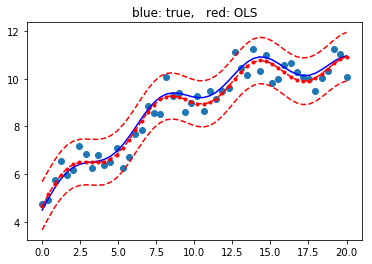

In [30]:
plt.figure()
plt.plot(x, y, 'o', x, y_true, 'b-')

plt.plot(x, res.fittedvalues, 'r--.')
plt.plot(x, iv_u, 'r--', x, iv_l, 'r--')
# savefig('ols_predict_0.png')
plt.title('blue: true,   red: OLS');

## Robust regression

Both **statsmodels** and **scikit-learn** support robust methods of regression
that are less sensitive to the presence of outliers than methods such as least
squares. Here are two visual examples comparing the ordinary least squares
algorithm with the Random Sample Consensus (RANSAC) algorithm implemented in
scikit-learn as ``RANSACRegressor``:

In [44]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

The following examples are based on the ``plot_theilsen.py`` code in scikit-
learn by Florian Wilhelm. License: BSD 3-clause.

First we generate data with outliers only in the y direction:

In [45]:
n_samples = 200

# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y_orig = 3 * x + 2 + noise
y = y_orig.copy()

# 10% outliers
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]

In [46]:
estimators = [('OLS', LinearRegression()),
              ('RANSAC', RANSACRegressor(random_state=42)), ]

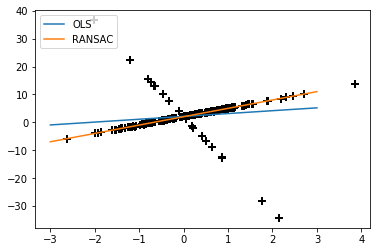

In [47]:
plt.plot(x, y, 'k+', mew=2, ms=8)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    estimator.fit(X, y)
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred,
             label=name)

plt.axis('tight')
plt.legend(loc='upper left');

The following example also has outliers in the X direction:

In [48]:
# 10% outliers
x[-20:] = 9.9
X = x[:, np.newaxis]

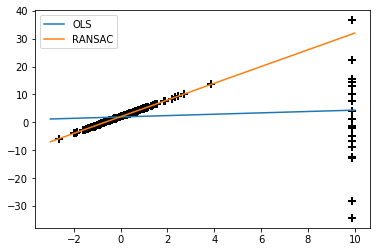

In [49]:
plt.figure()
plt.plot(x, y, 'k+', mew=2, ms=8)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    estimator.fit(X, y)
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred,
             label=name)

plt.axis('tight')
plt.legend(loc='upper left')
plt.show()